# Importing Libraries.
I usually import the Libraries just before using them and at last I will be placing them together at the top

In [1]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import ensemble
import sklearn.naive_bayes
import seaborn as sns
import pandas as pd
import sklearn


# Extracting Dataset
Specify the location to the Dataset and Import them.

In [2]:
data_path= 'inputs/diamonds.csv'
diamonds_org = pd.read_csv(data_path)

In [3]:
diamonds_org.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Examine the Nan values

In [4]:
diamonds_org.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Examining the unique values in each column

In [5]:
diamonds_org['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [6]:
diamonds_org['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
diamonds_org['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
diamonds_org['depth'].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [9]:
diamonds_org['table'].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [10]:
diamonds_org.loc[(diamonds_org['x']<=0) | (diamonds_org['y']<=0) | (diamonds_org['z']<=0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


It doesn't make any sense to have either of Length or Width or Height to be zero.
But we can see that there are some rows with values '0'. so, lets remove that rows from the dataframe.
Which is done below.

In [11]:
len(diamonds_org[(diamonds_org['x']<=0) | (diamonds_org['y']<=0) | (diamonds_org['z']<=0)])

20

In [12]:
diamonds_org = diamonds_org[(diamonds_org[['x','y','z']] != 0).all(axis=1)]

In [13]:
diamonds_org.loc[(diamonds_org['x']<=0) | (diamonds_org['y']<=0) | (diamonds_org['z']<=0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


From the above dataframe we can see that it contains following features:
    1. carat
    2. cut
    3. color
    4. depth 
    5. table 
    6. price 
    7. x (length in mm) 
    8. y (width in mm) 
    9. z (height in mm)
        
7, 8, 9 attributes can be merged into single attribute as volume,as volume = x*y*z, which is done below.


In [14]:
diamonds_org['volume'] = diamonds_org['x']*diamonds_org['y']*diamonds_org['z']

In [15]:
diamonds_org[:5]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


Now x, y, z are not required since they are merged to a single column volume. so we are dropping these columns.

In [16]:
diamonds_org = diamonds_org.drop(['x', 'y', 'z'], axis=1)


In [17]:
diamonds_org[:5]

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [18]:
#help(sns.heatmap)

# Correlation Between Features

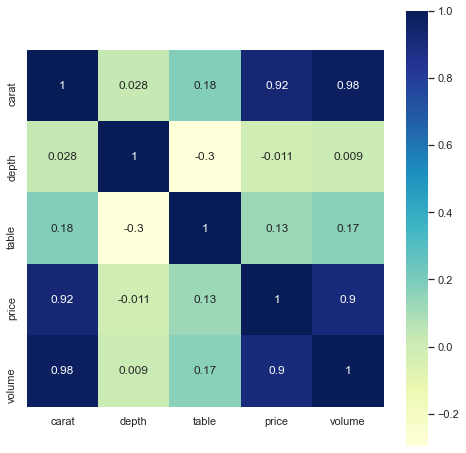

In [19]:
sns.set(rc={'figure.figsize':(8,8)})
corr = diamonds_org.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True, cmap="YlGnBu")

Conclusions from above graph:
1. Depth is inversely related to Price.

2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

4. The volume seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.

6. Some other Inferences can also be drawn.

# Visualization Of All Features


# Carat

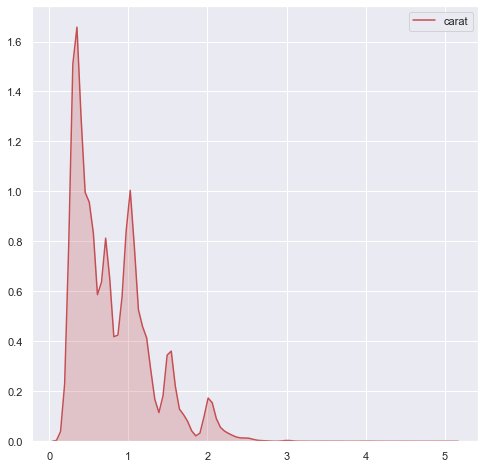

In [20]:
sns.kdeplot(diamonds_org['carat'], shade=True , color='r')

# Carat vs price

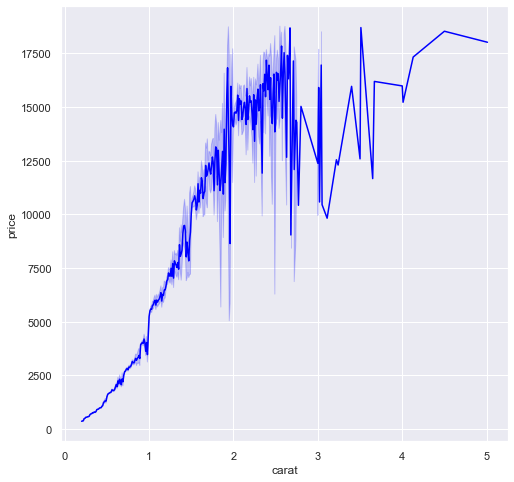

In [21]:
sns.lineplot(diamonds_org['carat'], diamonds_org['price'], color='blue')

# Cut

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


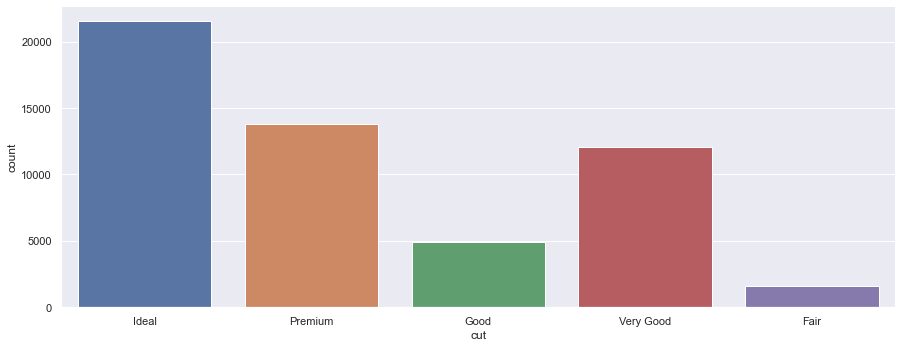

In [22]:
sns.factorplot(x='cut', data=diamonds_org , kind='count',aspect=2.5 )

# Cut vs Price

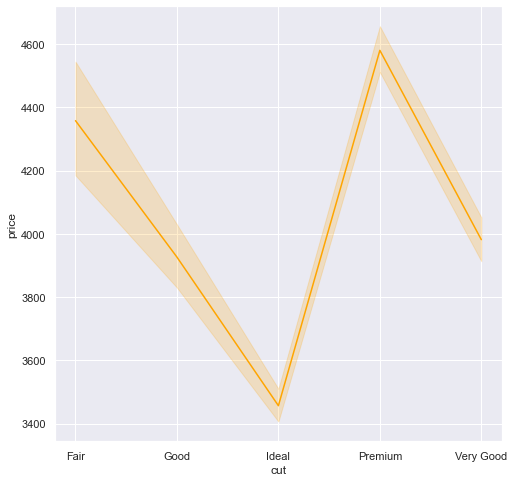

In [23]:
sns.lineplot(diamonds_org['cut'], diamonds_org['price'], color='orange')

# Color

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


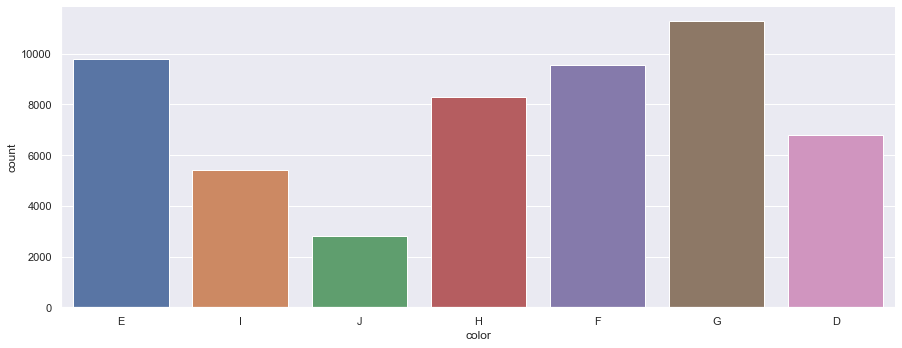

In [24]:
sns.factorplot(x='color', data=diamonds_org , kind='count',aspect=2.5 )

# Color vs Price

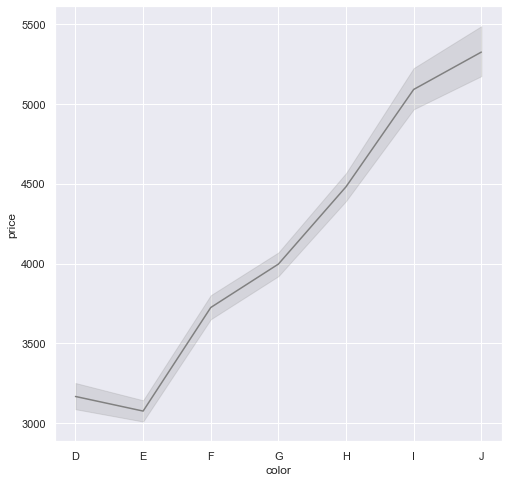

In [25]:
sns.lineplot(diamonds_org['color'], diamonds_org['price'], color='gray')

# clarity

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


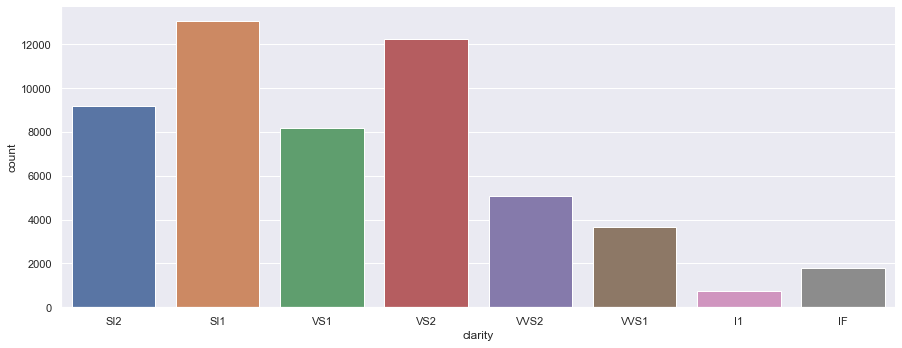

In [26]:
sns.factorplot(x='clarity', data=diamonds_org , kind='count',aspect=2.5 )

# clarity vs price

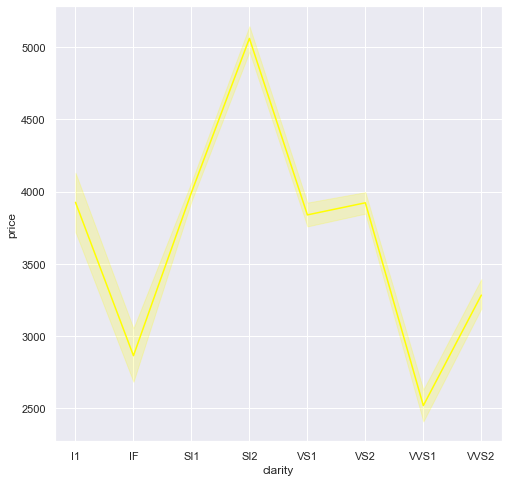

In [27]:
sns.lineplot(diamonds_org['clarity'], diamonds_org['price'], color='yellow')

# depth

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

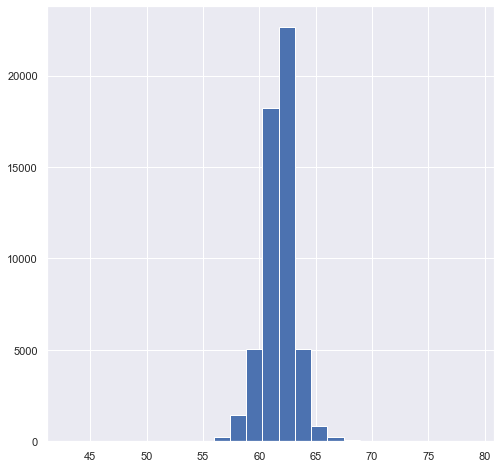

In [28]:
plt.hist('depth' , data=diamonds_org , bins=25)

# depth vs price

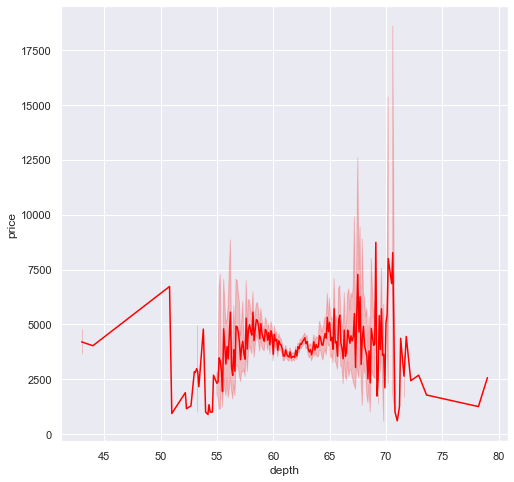

In [29]:
sns.lineplot(diamonds_org['depth'], diamonds_org['price'], color='red')

# table

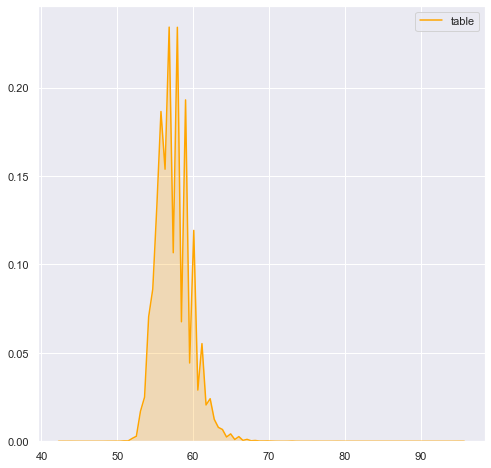

In [30]:
sns.kdeplot(diamonds_org['table'] ,shade=True , color='orange')

# table vs price

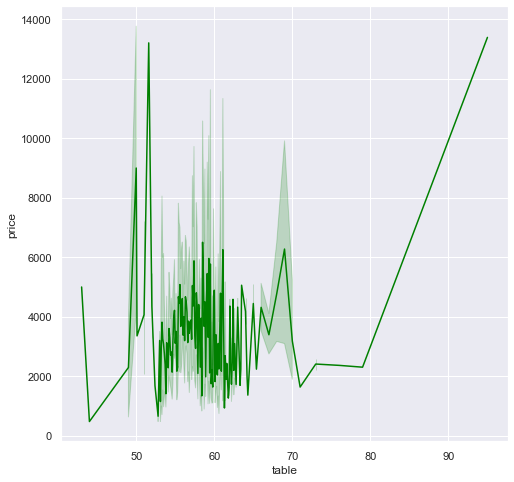

In [31]:
sns.lineplot(diamonds_org['table'], diamonds_org['price'], color='green')

# Volume

(0.0, 50000.0)

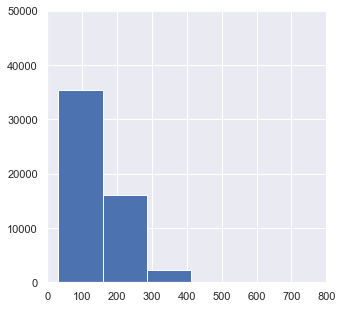

In [32]:
plt.figure(figsize=(5,5))
plt.hist( x=diamonds_org['volume'] , bins=30)
plt.xlim(0,800)
plt.ylim(0,50000)

# volume vs price

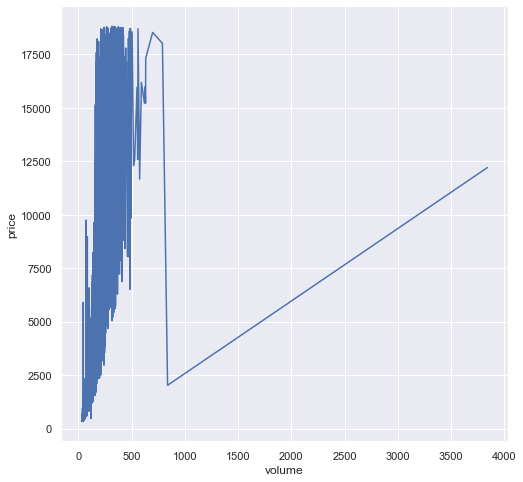

In [33]:
sns.lineplot(diamonds_org['volume'], diamonds_org['price'])

# Feature Encoding

checking the datatypes of the features

In [34]:
diamonds_org.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
volume     float64
dtype: object

one-hot encoding for cut

In [35]:
#help(pd.get_dummies)

In [36]:
dummy_cut = pd.get_dummies(diamonds_org['cut'], prefix = 'cut' , drop_first = True)
dummy_cut.head()


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [37]:
print(diamonds_org.shape)
print(dummy_cut.shape)


(53920, 8)
(53920, 4)


concatinating dummy_cut and diamonds_org dataframes

In [38]:
X = pd.concat([diamonds_org, dummy_cut], axis=1)
print(X.shape)
print(X[:3])

(53920, 12)
   carat      cut color clarity  depth  table  price     volume  cut_Good  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  38.202030         0   
1   0.21  Premium     E     SI1   59.8   61.0    326  34.505856         0   
2   0.23     Good     E     VS1   56.9   65.0    327  38.076885         1   

   cut_Ideal  cut_Premium  cut_Very Good  
0          1            0              0  
1          0            1              0  
2          0            0              0  


Droping the cut column as it has been encoded 

In [39]:
X = X.drop(['cut'], axis=1)
print(X.shape)
X[:3]

(53920, 11)


,carat,color,clarity,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,38.202030,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,34.505856,0,0,1,0
2,0.23,E,VS1,56.9,65.0,327,38.076885,1,0,0,0


one-hot encoding for color

In [40]:
dummy_color = pd.get_dummies(X['color'], prefix = 'color' , drop_first = True)

print(dummy_color.shape)
print(X.shape)

(53920, 6)
(53920, 11)


concatinating the X and dummy_color dataframes, and dropping the color column

In [41]:
X = pd.concat([X, dummy_color], axis=1)
X = X.drop(['color'], axis=1)
print(X.shape)

X[:3]

(53920, 16)


,carat,clarity,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,SI2,61.5,55.0,326,38.202030,0,1,0,0,1,0,0,0,0,0
1,0.21,SI1,59.8,61.0,326,34.505856,0,0,1,0,1,0,0,0,0,0
2,0.23,VS1,56.9,65.0,327,38.076885,1,0,0,0,1,0,0,0,0,0


In [42]:
dummy_clarity = pd.get_dummies(X['clarity'], prefix = 'clarity' , 
                               drop_first = True)
print(dummy_clarity.shape)
print(X.shape)

X = pd.concat([X, dummy_clarity], axis=1)
X = X.drop(['clarity'], axis=1)
X[:5]

(53920, 7)
(53920, 16)


,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Feature Scaling

In [43]:
#spliting the data into X, y

In [44]:
y = X['price']
print(y[:5])
X = X.drop(['price'], axis=1)
print(X[:5])

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64
   carat  depth  table     volume  cut_Good  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0  38.202030         0          1            0   
1   0.21   59.8   61.0  34.505856         0          0            1   
2   0.23   56.9   65.0  38.076885         1          0            0   
3   0.29   62.4   58.0  46.724580         0          0            1   
4   0.31   63.3   58.0  51.917250         1          0            0   

   cut_Very Good  color_E  color_F  ...  color_H  color_I  color_J  \
0              0        1        0  ...        0        0        0   
1              0        1        0  ...        0        0        0   
2              0        1        0  ...        0        0        0   
3              0        0        0  ...        0        1        0   
4              0        0        0  ...        0        0        1   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0           

In [45]:
#spliting the data into train and test data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

# Modelling Algos

In [47]:
models = ['RandomForestRegressor', 'AdaBoostRegressor', 'ExtraTreesRegressor', 'GradientBoostingRegressor', 'LinearRegression']
r2_scores = []

# RandomForestRegressor()

In [48]:
model_RF =  RandomForestRegressor()
model_RF.fit(X_train , y_train)

y_pred = model_RF.predict(X_test)
accuracies = cross_val_score(estimator = model_RF, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### RandomForestRegressor ######')
print('Score : %.4f' % model_RF.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished



###### RandomForestRegressor ######
Score : 0.9777
[0.97428258 0.97438249 0.97495143 0.97064804 0.97668897]

MSE    : 359306.33 
MAE    : 291.18 
R2     : 0.98 


# AdaBoostRegressor()

In [49]:
model_ABR =  AdaBoostRegressor()
model_ABR.fit(X_train , y_train)

y_pred = model_ABR.predict(X_test)
accuracies = cross_val_score(estimator = model_ABR, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### AdaBoostRegressor ######')
print('Score : %.4f' % model_ABR.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoostRegressor ######
Score : 0.8543
[0.85373588 0.85027538 0.85585704 0.864447   0.85199612]

MSE    : 2348989.31 
MAE    : 1026.84 
R2     : 0.85 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s finished


# ExtraTreesRegressor()

In [50]:
model_ETR =  ExtraTreesRegressor()
model_ETR.fit(X_train , y_train)

y_pred = model_ETR.predict(X_test)
accuracies = cross_val_score(estimator = model_ETR, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### ExtraTreesRegressor ######')
print('Score : %.4f' % model_ETR.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   57.4s finished



###### ExtraTreesRegressor ######
Score : 0.9809
[0.97745314 0.97893516 0.97932801 0.97744303 0.97926366]

MSE    : 308124.25 
MAE    : 283.27 
R2     : 0.98 


# GradientBoostingRegressor()

In [51]:

model_GBR =  GradientBoostingRegressor()
model_GBR.fit(X_train , y_train)

y_pred = model_GBR.predict(X_test)
accuracies = cross_val_score(estimator = model_GBR, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### GradientBoostingRegressor ######')
print('Score : %.4f' % model_GBR.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### GradientBoostingRegressor ######
Score : 0.9543
[0.95132023 0.95433796 0.9519782  0.9506151  0.95146671]

MSE    : 736301.14 
MAE    : 436.91 
R2     : 0.95 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.3s finished


# LinearRegression()

In [52]:
model_LR =  LinearRegression()
model_LR.fit(X_train , y_train)

y_pred = model_LR.predict(X_test)
accuracies = cross_val_score(estimator = model_LR, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### LinearRegression ######')
print('Score : %.4f' % model_LR.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### LinearRegression ######
Score : 0.9174
[0.90964582 0.91787447 0.9141475  0.91308067 0.91860997]

MSE    : 1330841.23 
MAE    : 801.21 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


# Visualizing R2-Score of Algorithms

In [53]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : r2_scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
2,ExtraTreesRegressor,0.980886
0,RandomForestRegressor,0.977711
3,GradientBoostingRegressor,0.954326
4,LinearRegression,0.917445
1,AdaBoostRegressor,0.854287


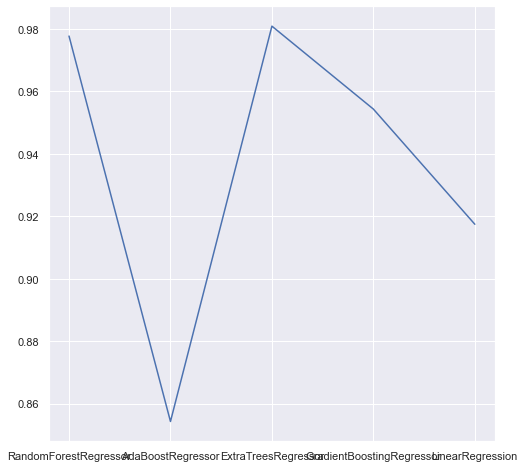

In [54]:
plt.plot(compare['Algorithms'], compare['R2-Scores'], label = "R2-Score")


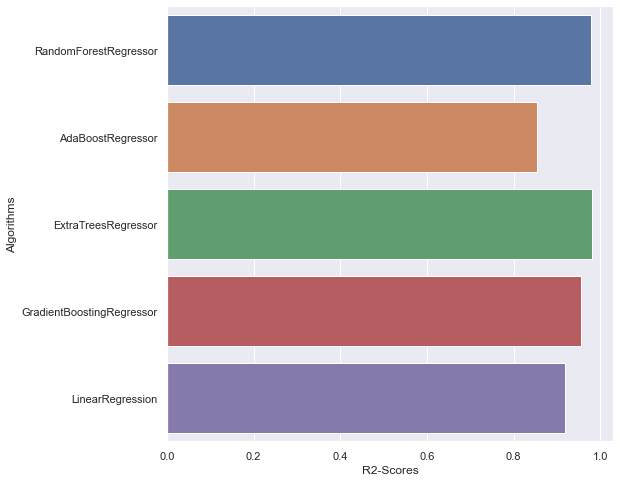

In [55]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

# ExtraTreesRegressor as it has the highest r2_score (98%)

THE END